# Thermal Imaging Data Analysis Pipeline
## ICI and FLIR Dataset Comparison

# ICI Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
ici_df = pd.read_csv('ICI_cleaned_long.csv')

print("Dataset Overview:")
print(f"Total records: {len(ici_df)}")
print(f"Unique subjects: {ici_df['SubjectID'].nunique()}")
print(f"Rounds: {ici_df['Round'].unique()}")
print("\nFirst few rows:")
print(ici_df.head())
print("\nData types:")
print(ici_df.dtypes)
print("\nMissing values:")
print(ici_df.isnull().sum())

Dataset Overview:
Total records: 4036
Unique subjects: 1009
Rounds: [1 2 3 4]

First few rows:
  SubjectID  aveOralM  Round  T_FHC_Max  T_FH_Max  canthi4Max   T_LC  T_Max  \
0  161117-1     36.59      1      33.53     34.42       35.45  35.45  35.49   
1  161117-1     36.59      2      33.59     34.30       35.33  35.33  35.74   
2  161117-1     36.59      3      33.63     34.46       35.40  35.40  35.84   
3  161117-1     36.59      4      33.73     34.10       35.41  35.41  36.39   
4  161117-2     37.19      1      33.90     34.38       34.94  34.88  34.96   

   T_FHRC  T_RC_Max  ...  T_offset  T_OR_Max   T_RC  T_FHBC  Max1R13  \
0   32.86     34.94  ...     -0.27     35.42  34.92   32.97    34.94   
1   32.98     34.91  ...     -0.49     35.74  34.90   33.16    34.91   
2   33.17     35.05  ...     -0.41     35.84  35.03   33.13    35.05   
3   33.18     34.96  ...     -0.58     36.39  34.94   33.22    34.96   
4   33.01     34.89  ...     -0.21     34.89  34.80   33.56    33.56  

## Temperature Distribution Analysis

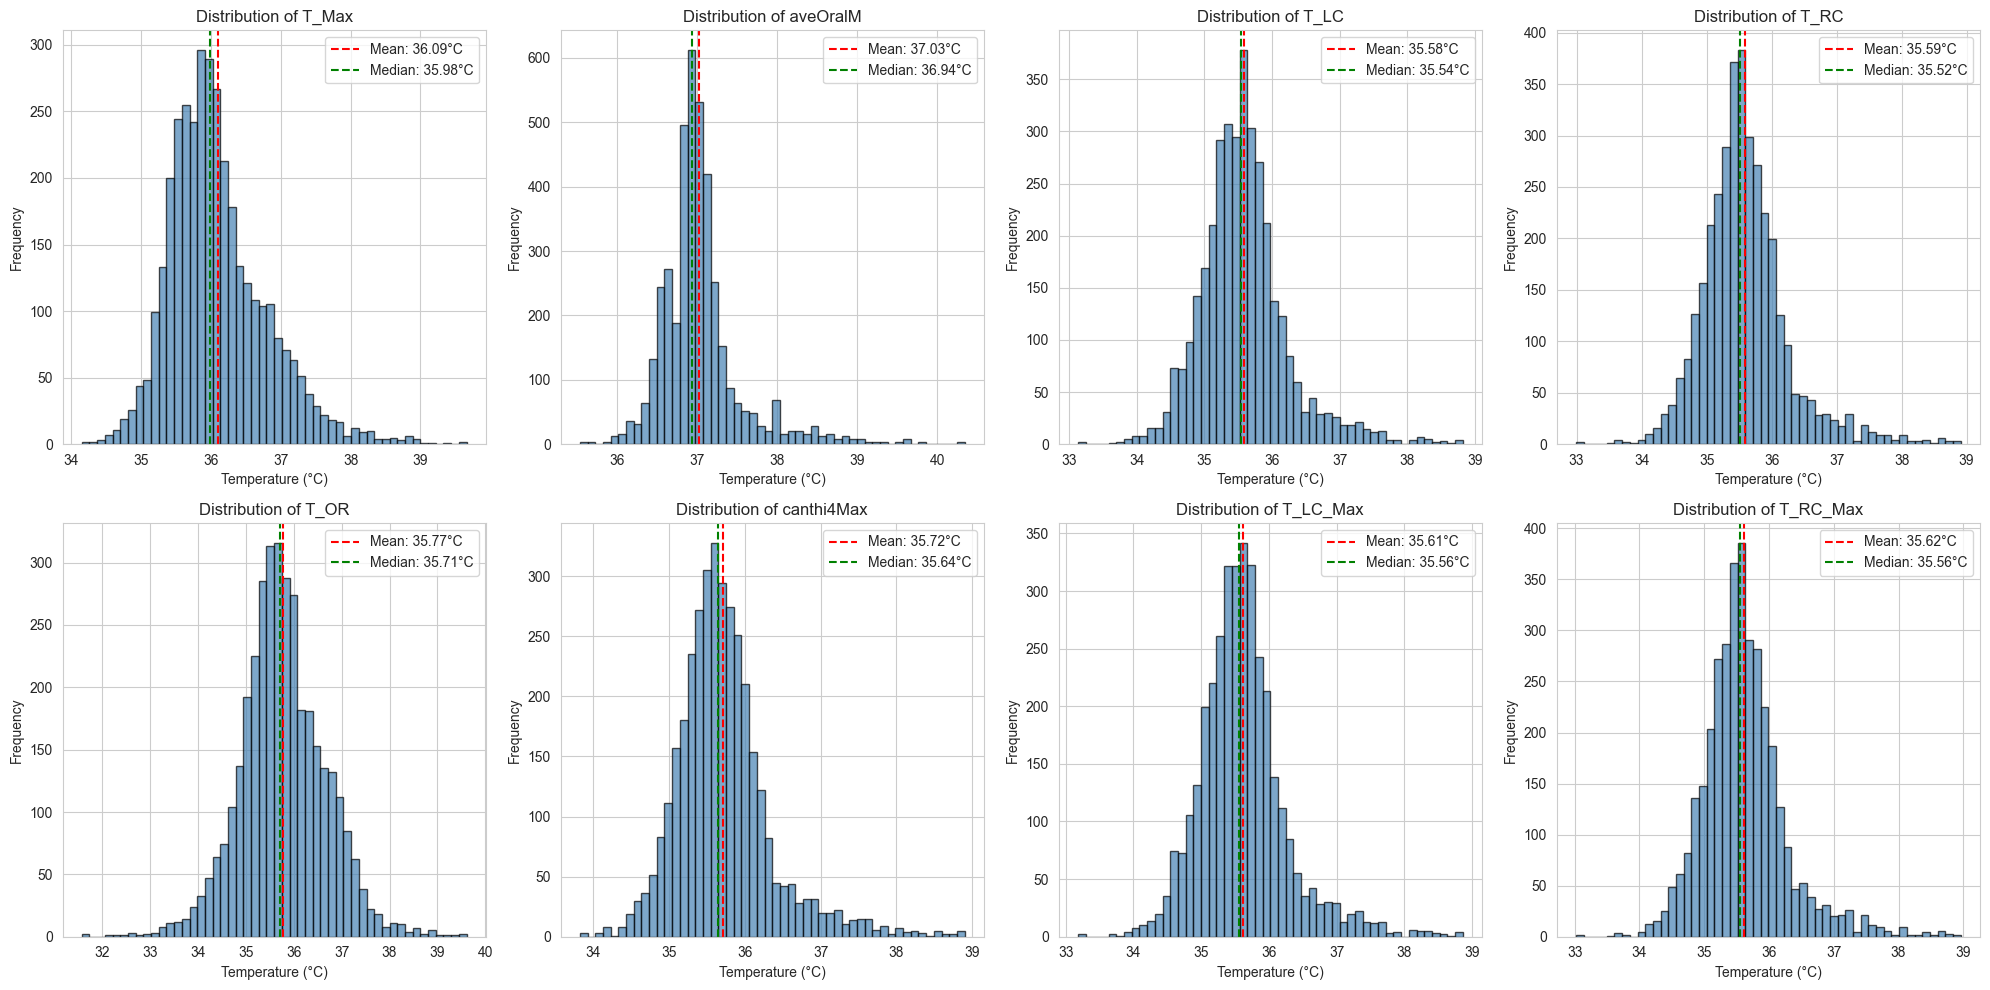


Summary Statistics:
             T_Max     aveOralM         T_LC         T_RC         T_OR  \
count  3607.000000  4036.000000  3607.000000  3608.000000  3607.000000   
mean     36.093909    37.030486    35.580760    35.586167    35.765090   
std       0.702057     0.510974     0.647533     0.658513     0.891559   
min      34.150000    35.540000    33.130000    32.990000    31.570000   
25%      35.610000    36.790000    35.190000    35.200000    35.220000   
50%      35.980000    36.940000    35.540000    35.520000    35.710000   
75%      36.460000    37.140000    35.870000    35.880000    36.310000   
max      39.660000    40.340000    38.820000    38.910000    39.610000   

        canthi4Max     T_LC_Max     T_RC_Max  
count  3606.000000  3607.000000  3607.000000  
mean     35.715682    35.613793    35.617960  
std       0.632029     0.647452     0.657566  
min      33.820000    33.180000    33.020000  
25%      35.340000    35.230000    35.230000  
50%      35.640000    35.56000

In [2]:
# Key temperature variables to analyze
temp_columns = ['T_Max', 'aveOralM', 'T_LC', 'T_RC', 'T_OR', 
                'canthi4Max', 'T_LC_Max', 'T_RC_Max']

# Create distribution plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(temp_columns):
    if col in ici_df.columns:
        data = ici_df[col].dropna()
        axes[idx].hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        axes[idx].axvline(data.mean(), color='red', linestyle='--', 
                          label=f'Mean: {data.mean():.2f}°C')
        axes[idx].axvline(data.median(), color='green', linestyle='--', 
                          label=f'Median: {data.median():.2f}°C')
        axes[idx].set_xlabel('Temperature (°C)')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].legend()

plt.tight_layout()
plt.savefig('temperature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print(ici_df[temp_columns].describe())

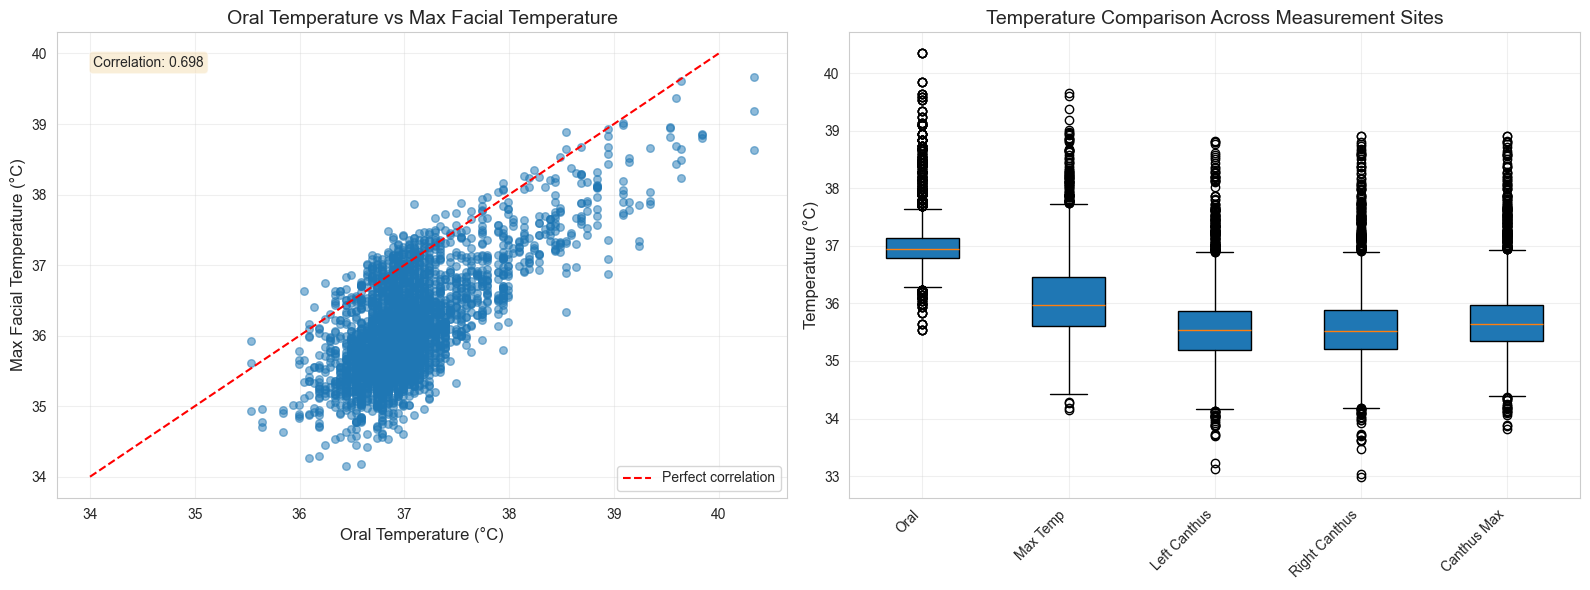


Temperature Differences from Oral Temperature:

T_Max:
  Mean difference: 0.93°C (±0.50)
  Range: [-0.77, 2.41]

T_LC:
  Mean difference: 1.45°C (±0.43)
  Range: [-0.15, 3.46]

T_RC:
  Mean difference: 1.44°C (±0.43)
  Range: [0.08, 3.90]

canthi4Max:
  Mean difference: 1.31°C (±0.40)
  Range: [-0.15, 3.02]


In [3]:
# Compare oral temperature with facial temperatures
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Oral vs Max Temperature
axes[0].scatter(ici_df['aveOralM'], ici_df['T_Max'], alpha=0.5, s=30)
axes[0].plot([34, 40], [34, 40], 'r--', label='Perfect correlation')
axes[0].set_xlabel('Oral Temperature (°C)', fontsize=12)
axes[0].set_ylabel('Max Facial Temperature (°C)', fontsize=12)
axes[0].set_title('Oral Temperature vs Max Facial Temperature', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Calculate correlation
correlation = ici_df[['aveOralM', 'T_Max']].corr().iloc[0, 1]
axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Box plot: Comparison across different measurements
comparison_data = pd.DataFrame({
    'Oral': ici_df['aveOralM'],
    'Max Temp': ici_df['T_Max'],
    'Left Canthus': ici_df['T_LC'],
    'Right Canthus': ici_df['T_RC'],
    'Canthus Max': ici_df['canthi4Max']
})

axes[1].boxplot([comparison_data[col].dropna() for col in comparison_data.columns],
                labels=comparison_data.columns, patch_artist=True)
axes[1].set_ylabel('Temperature (°C)', fontsize=12)
axes[1].set_title('Temperature Comparison Across Measurement Sites', fontsize=14)
axes[1].grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('oral_vs_external_temps.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison
print("\nTemperature Differences from Oral Temperature:")
for col in ['T_Max', 'T_LC', 'T_RC', 'canthi4Max']:
    diff = ici_df['aveOralM'] - ici_df[col]
    print(f"\n{col}:")
    print(f"  Mean difference: {diff.mean():.2f}°C (±{diff.std():.2f})")
    print(f"  Range: [{diff.min():.2f}, {diff.max():.2f}]")

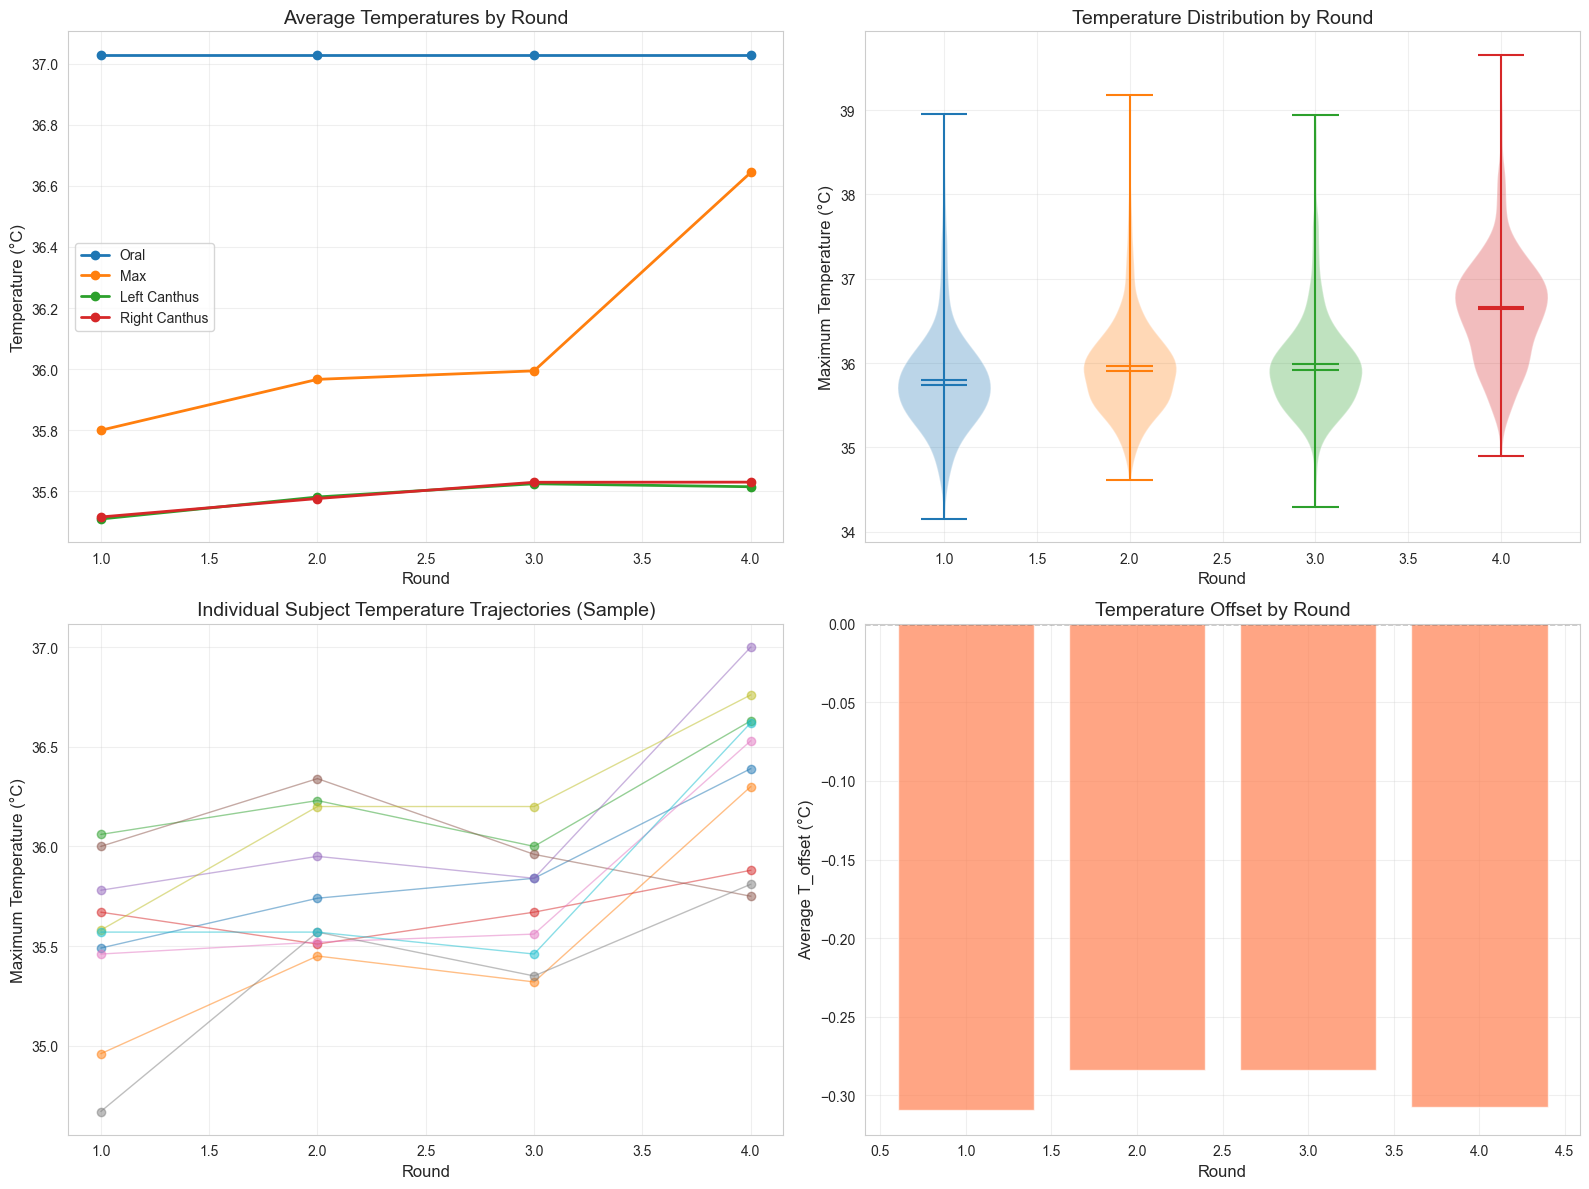


ANOVA Test for Round Differences:
F-statistic: 317.3607
P-value: 0.0000
Significant differences found between rounds!


In [4]:
# Analyze temperature changes across rounds
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Average temperatures by round
round_means = ici_df.groupby('Round')[['aveOralM', 'T_Max', 'T_LC', 'T_RC']].mean()
round_means.plot(ax=axes[0, 0], marker='o', linewidth=2)
axes[0, 0].set_xlabel('Round', fontsize=12)
axes[0, 0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0, 0].set_title('Average Temperatures by Round', fontsize=14)
axes[0, 0].legend(['Oral', 'Max', 'Left Canthus', 'Right Canthus'])
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Temperature range by round
for round_num in [1, 2, 3, 4]:
    round_data = ici_df[ici_df['Round'] == round_num]['T_Max'].dropna()
    axes[0, 1].violinplot([round_data], positions=[round_num], 
                          showmeans=True, showmedians=True)

axes[0, 1].set_xlabel('Round', fontsize=12)
axes[0, 1].set_ylabel('Maximum Temperature (°C)', fontsize=12)
axes[0, 1].set_title('Temperature Distribution by Round', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Individual subject trajectories (sample)
sample_subjects = ici_df['SubjectID'].unique()[:10]
for subject in sample_subjects:
    subject_data = ici_df[ici_df['SubjectID'] == subject].sort_values('Round')
    axes[1, 0].plot(subject_data['Round'], subject_data['T_Max'], 
                    marker='o', alpha=0.5, linewidth=1)

axes[1, 0].set_xlabel('Round', fontsize=12)
axes[1, 0].set_ylabel('Maximum Temperature (°C)', fontsize=12)
axes[1, 0].set_title('Individual Subject Temperature Trajectories (Sample)', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: T_offset changes by round
round_offset = ici_df.groupby('Round')['T_offset'].mean()
axes[1, 1].bar(round_offset.index, round_offset.values, color='coral', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Round', fontsize=12)
axes[1, 1].set_ylabel('Average T_offset (°C)', fontsize=12)
axes[1, 1].set_title('Temperature Offset by Round', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('round_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical test for round differences
print("\nANOVA Test for Round Differences:")
rounds_data = [ici_df[ici_df['Round'] == r]['T_Max'].dropna() for r in [1, 2, 3, 4]]
f_stat, p_value = stats.f_oneway(*rounds_data)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant differences found between rounds!")
else:
    print("No significant differences between rounds.")

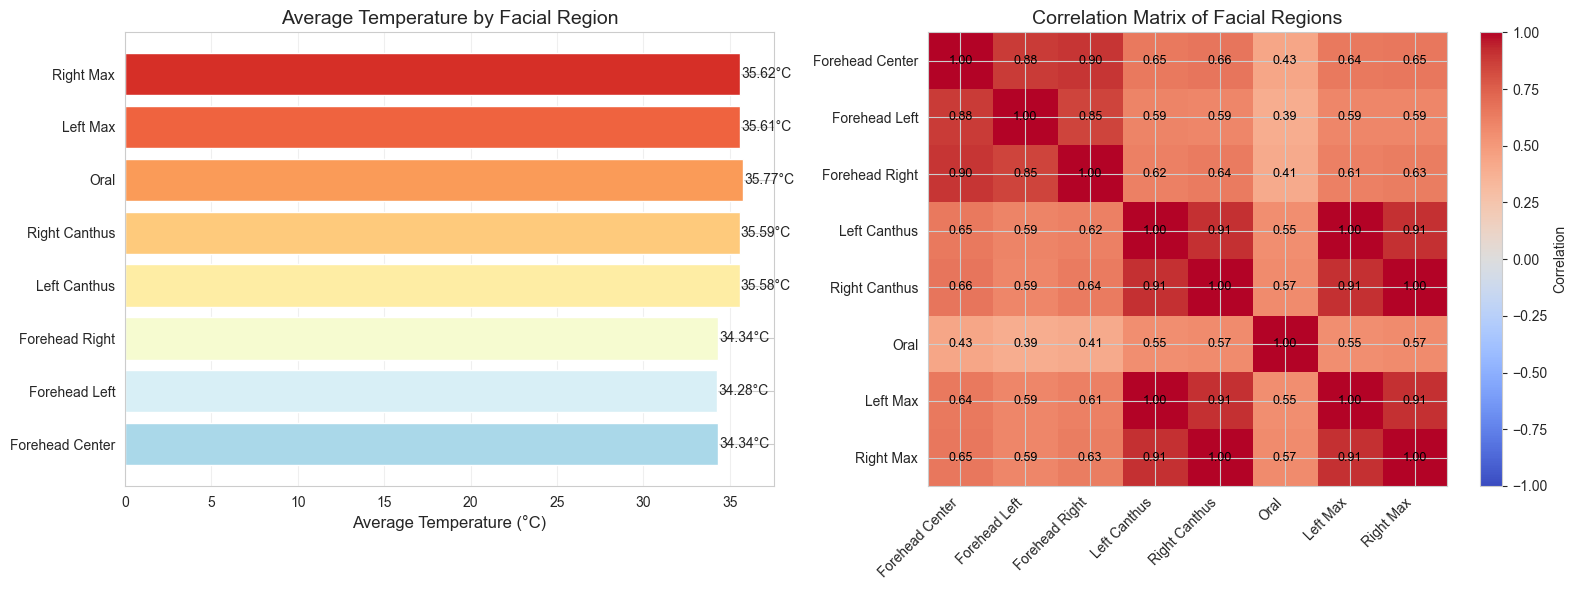

In [5]:
# Create a facial temperature heatmap
facial_regions = {
    'Forehead Center': 'T_FHCC',
    'Forehead Left': 'T_FHLC',
    'Forehead Right': 'T_FHRC',
    'Left Canthus': 'T_LC',
    'Right Canthus': 'T_RC',
    'Oral': 'T_OR',
    'Left Max': 'T_LC_Max',
    'Right Max': 'T_RC_Max'
}

# Calculate average temperatures for each region
region_temps = {}
for region, col in facial_regions.items():
    if col in ici_df.columns:
        region_temps[region] = ici_df[col].mean()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of regional temperatures
regions = list(region_temps.keys())
temps = list(region_temps.values())
colors = plt.cm.RdYlBu_r(np.linspace(0.3, 0.9, len(regions)))

bars = axes[0].barh(regions, temps, color=colors)
axes[0].set_xlabel('Average Temperature (°C)', fontsize=12)
axes[0].set_title('Average Temperature by Facial Region', fontsize=14)
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, temp in zip(bars, temps):
    axes[0].text(temp + 0.05, bar.get_y() + bar.get_height()/2, 
                f'{temp:.2f}°C', va='center', fontsize=10)

# Correlation matrix of facial regions
facial_cols = [col for col in facial_regions.values() if col in ici_df.columns]
corr_matrix = ici_df[facial_cols].corr()

im = axes[1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1].set_xticks(range(len(facial_cols)))
axes[1].set_yticks(range(len(facial_cols)))
axes[1].set_xticklabels([k for k, v in facial_regions.items() if v in facial_cols], 
                        rotation=45, ha='right')
axes[1].set_yticklabels([k for k, v in facial_regions.items() if v in facial_cols])
axes[1].set_title('Correlation Matrix of Facial Regions', fontsize=14)

# Add correlation values
for i in range(len(facial_cols)):
    for j in range(len(facial_cols)):
        text = axes[1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im, ax=axes[1], label='Correlation')
plt.tight_layout()
plt.savefig('facial_region_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

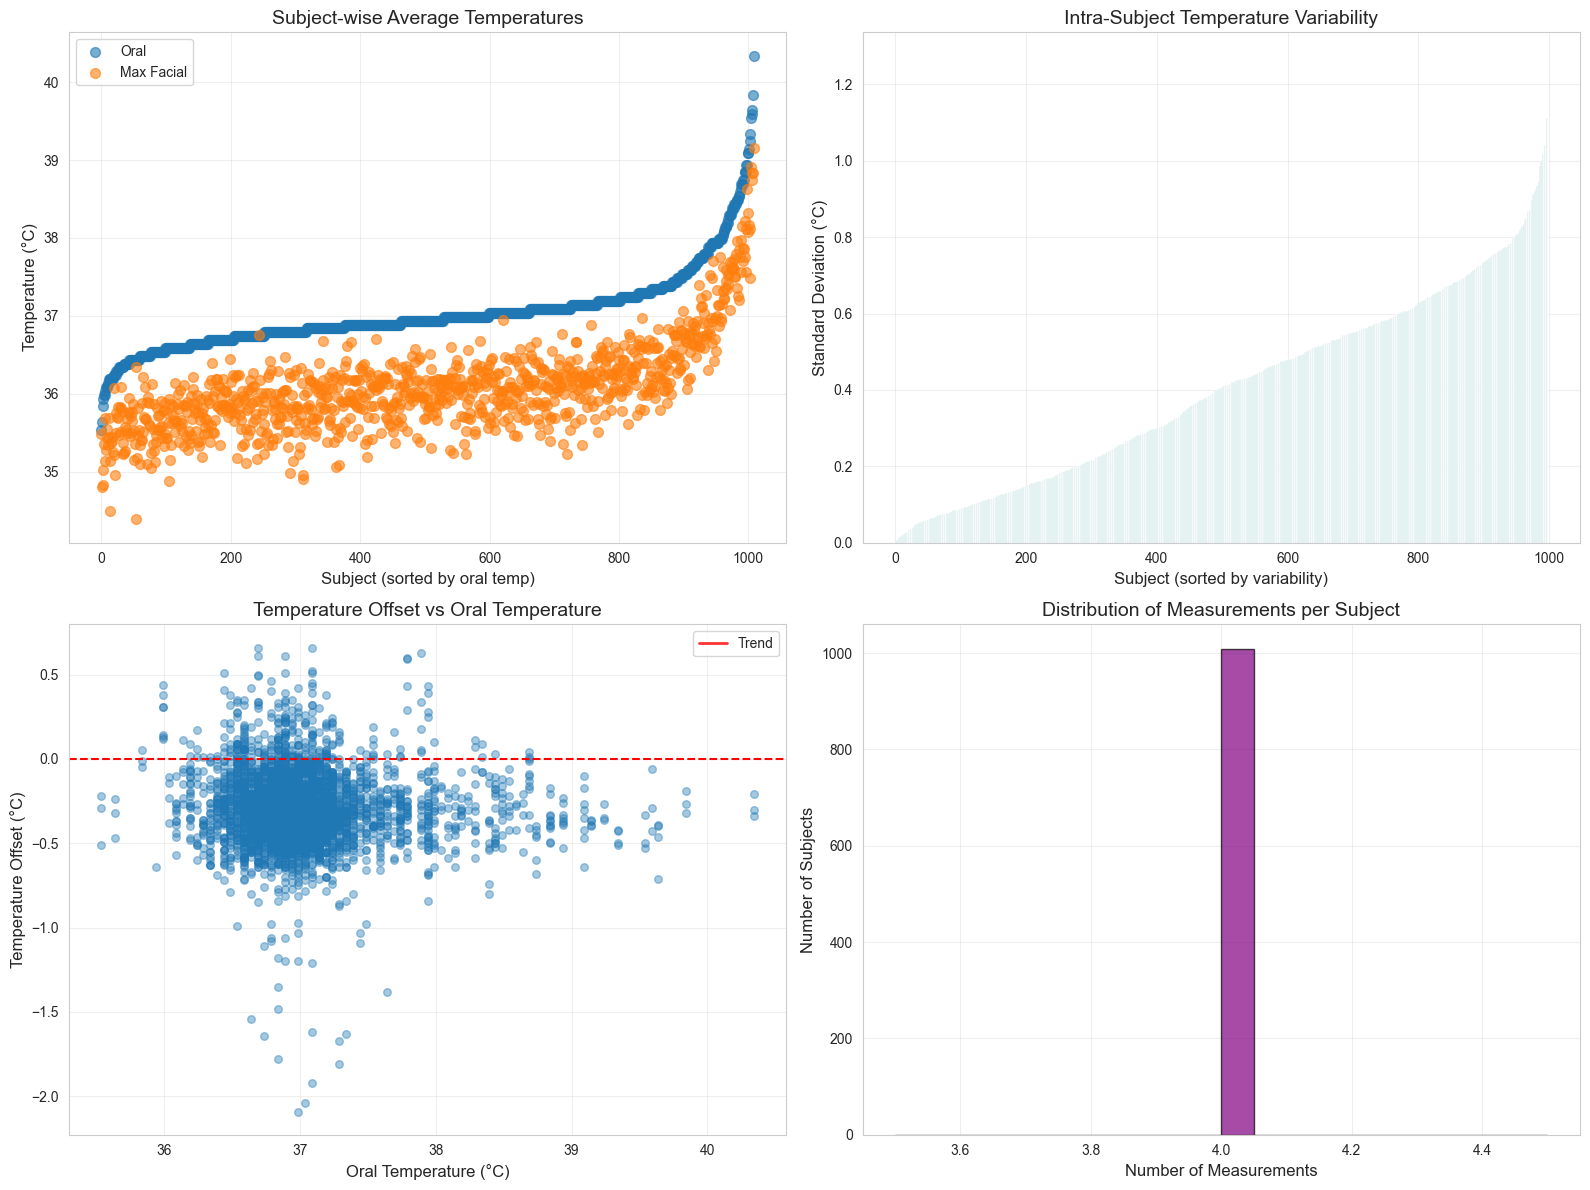


Subject Variability Summary:
Number of subjects: 1009
Average measurements per subject: 4.0
Min measurements: 4
Max measurements: 4


In [6]:
# Analyze inter-subject and intra-subject variability
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Subject-wise average temperatures
subject_avg = ici_df.groupby('SubjectID').agg({
    'aveOralM': 'mean',
    'T_Max': 'mean',
    'T_offset': 'mean'
}).sort_values('aveOralM')

axes[0, 0].scatter(range(len(subject_avg)), subject_avg['aveOralM'], 
                   alpha=0.6, s=50, label='Oral')
axes[0, 0].scatter(range(len(subject_avg)), subject_avg['T_Max'], 
                   alpha=0.6, s=50, label='Max Facial')
axes[0, 0].set_xlabel('Subject (sorted by oral temp)', fontsize=12)
axes[0, 0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0, 0].set_title('Subject-wise Average Temperatures', fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Intra-subject variability
subject_std = ici_df.groupby('SubjectID')['T_Max'].std().sort_values()
axes[0, 1].bar(range(len(subject_std)), subject_std.values, color='teal', alpha=0.7)
axes[0, 1].set_xlabel('Subject (sorted by variability)', fontsize=12)
axes[0, 1].set_ylabel('Standard Deviation (°C)', fontsize=12)
axes[0, 1].set_title('Intra-Subject Temperature Variability', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Relationship between oral temp and offset
axes[1, 0].scatter(ici_df['aveOralM'], ici_df['T_offset'], alpha=0.4, s=30)
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Oral Temperature (°C)', fontsize=12)
axes[1, 0].set_ylabel('Temperature Offset (°C)', fontsize=12)
axes[1, 0].set_title('Temperature Offset vs Oral Temperature', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(ici_df['aveOralM'].dropna(), 
               ici_df.loc[ici_df['aveOralM'].notna(), 'T_offset'], 1)
p = np.poly1d(z)
x_trend = np.linspace(ici_df['aveOralM'].min(), ici_df['aveOralM'].max(), 100)
axes[1, 0].plot(x_trend, p(x_trend), "r-", alpha=0.8, linewidth=2, label='Trend')
axes[1, 0].legend()

# Plot 4: Distribution of measurements per subject
measurements_per_subject = ici_df.groupby('SubjectID').size()
axes[1, 1].hist(measurements_per_subject, bins=20, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Number of Measurements', fontsize=12)
axes[1, 1].set_ylabel('Number of Subjects', fontsize=12)
axes[1, 1].set_title('Distribution of Measurements per Subject', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('subject_variability.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSubject Variability Summary:")
print(f"Number of subjects: {ici_df['SubjectID'].nunique()}")
print(f"Average measurements per subject: {measurements_per_subject.mean():.1f}")
print(f"Min measurements: {measurements_per_subject.min()}")
print(f"Max measurements: {measurements_per_subject.max()}")

In [7]:
# Generate comprehensive summary report
print("="*70)
print("COMPREHENSIVE DATA ANALYSIS SUMMARY")
print("="*70)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total observations: {len(ici_df):,}")
print(f"   - Unique subjects: {ici_df['SubjectID'].nunique()}")
print(f"   - Date range: {ici_df['SubjectID'].str[:6].min()} to {ici_df['SubjectID'].str[:6].max()}")
print(f"   - Measurement rounds: {sorted(ici_df['Round'].unique())}")

print("\n2. TEMPERATURE SUMMARY:")
print(f"   Oral Temperature:")
print(f"   - Mean: {ici_df['aveOralM'].mean():.2f}°C (±{ici_df['aveOralM'].std():.2f})")
print(f"   - Range: [{ici_df['aveOralM'].min():.2f}, {ici_df['aveOralM'].max():.2f}]°C")
print(f"\n   Max Facial Temperature:")
print(f"   - Mean: {ici_df['T_Max'].mean():.2f}°C (±{ici_df['T_Max'].std():.2f})")
print(f"   - Range: [{ici_df['T_Max'].min():.2f}, {ici_df['T_Max'].max():.2f}]°C")
print(f"\n   Temperature Offset:")
print(f"   - Mean: {ici_df['T_offset'].mean():.2f}°C (±{ici_df['T_offset'].std():.2f})")

print("\n3. CORRELATIONS:")
key_correlations = ici_df[['aveOralM', 'T_Max', 'T_LC', 'T_RC', 'canthi4Max']].corr()['aveOralM'].sort_values(ascending=False)
print("   Correlation with Oral Temperature:")
for col, corr in key_correlations.items():
    if col != 'aveOralM':
        print(f"   - {col}: {corr:.3f}")

print("\n4. DATA QUALITY:")
completeness = (1 - ici_df.isnull().sum() / len(ici_df)) * 100
print("   Completeness by column (top variables):")
for col in ['aveOralM', 'T_Max', 'T_LC', 'T_RC', 'T_offset']:
    print(f"   - {col}: {completeness[col]:.1f}%")

print("\n" + "="*70)

COMPREHENSIVE DATA ANALYSIS SUMMARY

1. DATASET OVERVIEW:
   - Total observations: 4,036
   - Unique subjects: 1009
   - Date range: 161117 to 180514
   - Measurement rounds: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

2. TEMPERATURE SUMMARY:
   Oral Temperature:
   - Mean: 37.03°C (±0.51)
   - Range: [35.54, 40.34]°C

   Max Facial Temperature:
   - Mean: 36.09°C (±0.70)
   - Range: [34.15, 39.66]°C

   Temperature Offset:
   - Mean: -0.30°C (±0.23)

3. CORRELATIONS:
   Correlation with Oral Temperature:
   - canthi4Max: 0.779
   - T_RC: 0.759
   - T_LC: 0.743
   - T_Max: 0.698

4. DATA QUALITY:
   Completeness by column (top variables):
   - aveOralM: 100.0%
   - T_Max: 89.4%
   - T_LC: 89.4%
   - T_RC: 89.4%
   - T_offset: 89.4%



# FLIR Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the FLIR dataset
df = pd.read_csv('FLIR_cleaned_long.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Dataset Shape: (4080, 30)

First few rows:
  SubjectID  aveOralM  Round  T_FHC_Max  T_FH_Max  canthi4Max   T_LC  T_Max  \
0  161117-1     36.59      1      33.86     34.47       35.31  35.31  35.36   
1  161117-1     36.59      2      34.05     34.56       35.29  35.29  35.54   
2  161117-1     36.59      3      34.02     34.56       35.36  35.36  35.48   
3  161117-1     36.59      4      34.10     34.53       35.39  35.39  36.39   
4  161117-2     37.19      1      34.51     34.51       34.69  34.65  34.79   

   T_FHRC  T_RC_Max  ...  T_offset  T_OR_Max   T_RC  T_FHBC  Max1R13  \
0   33.28     34.98  ...      0.58     35.20  34.91   33.27    34.98   
1   33.42     35.07  ...      0.74     35.54  35.02   33.53    35.07   
2   33.55     35.05  ...      0.76     35.48  35.01   33.48    35.04   
3   33.66     35.03  ...      0.73     36.39  35.00   33.69    35.03   
4   33.50     34.71  ...      0.83     34.52  34.68   33.54    34.71   

   T_RC_Wet  T_FHTC   T_OR  aveAllR13  Max1L13  


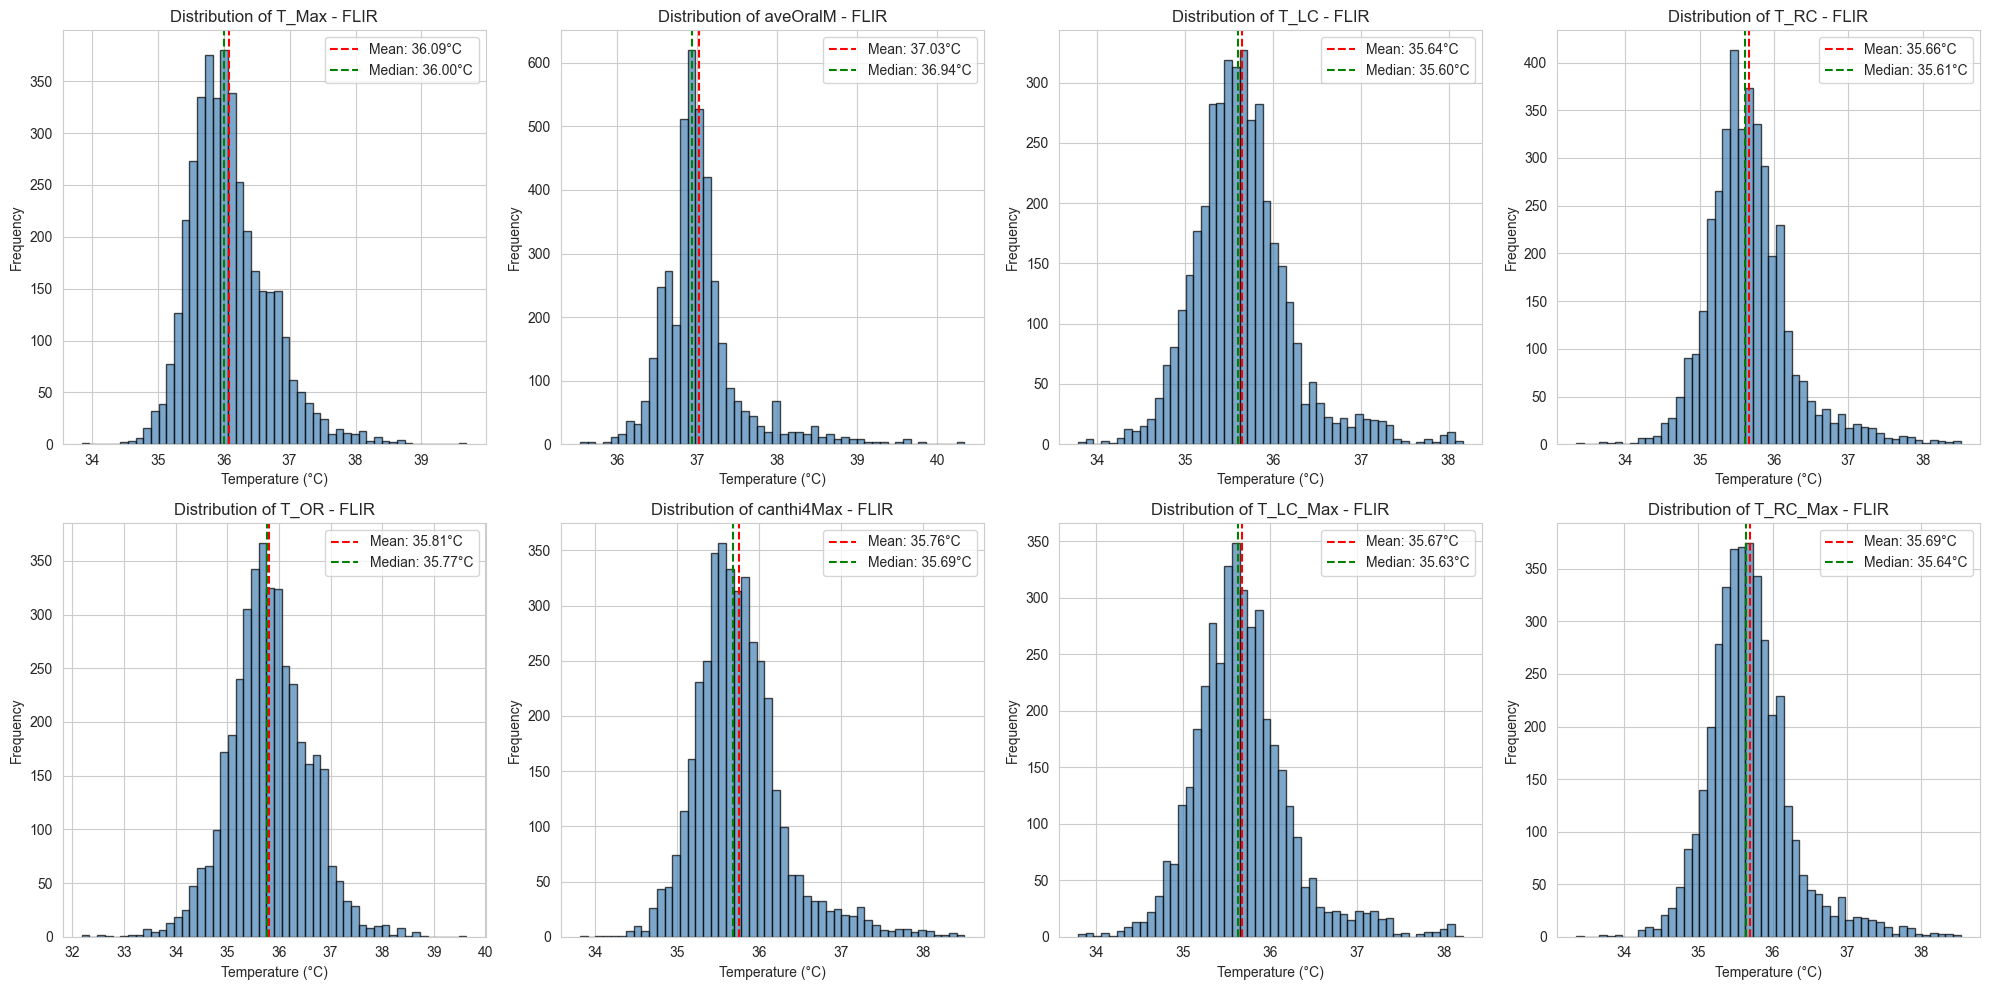


Summary Statistics - FLIR:
             T_Max     aveOralM         T_LC         T_RC         T_OR  \
count  4013.000000  4080.000000  4013.000000  4013.000000  4013.000000   
mean     36.086222    37.028382    35.642390    35.661291    35.806925   
std       0.600246     0.509315     0.549703     0.561429     0.765614   
min      33.850000    35.540000    33.780000    33.340000    32.180000   
25%      35.680000    36.777500    35.300000    35.320000    35.330000   
50%      36.000000    36.940000    35.600000    35.610000    35.770000   
75%      36.410000    37.140000    35.900000    35.920000    36.290000   
max      39.680000    40.340000    38.160000    38.510000    39.630000   

        canthi4Max     T_LC_Max     T_RC_Max  
count  4013.000000  4013.000000  4013.000000  
mean     35.759272    35.672457    35.691086  
std       0.541352     0.549640     0.561577  
min      33.820000    33.790000    33.350000  
25%      35.420000    35.330000    35.350000  
50%      35.690000    3

In [4]:
# Key temperature variables to analyze
temp_columns = ['T_Max', 'aveOralM', 'T_LC', 'T_RC', 'T_OR', 
                'canthi4Max', 'T_LC_Max', 'T_RC_Max']

# Create distribution plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(temp_columns):
    if col in flir_df.columns:
        data = flir_df[col].dropna()
        axes[idx].hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        axes[idx].axvline(data.mean(), color='red', linestyle='--', 
                          label=f'Mean: {data.mean():.2f}°C')
        axes[idx].axvline(data.median(), color='green', linestyle='--', 
                          label=f'Median: {data.median():.2f}°C')
        axes[idx].set_xlabel('Temperature (°C)')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Distribution of {col} - FLIR')
        axes[idx].legend()

plt.tight_layout()
plt.savefig('flir_temperature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\nSummary Statistics - FLIR:")
print(flir_df[temp_columns].describe())

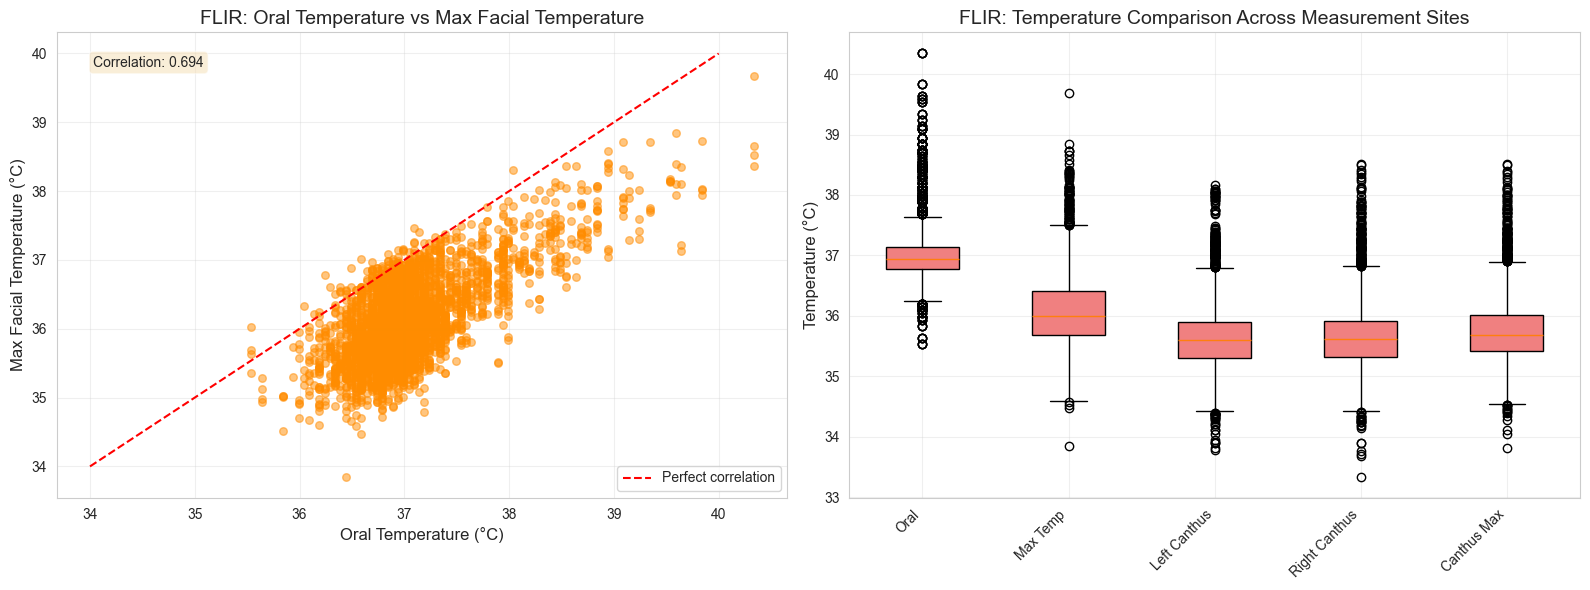


FLIR - Temperature Differences from Oral Temperature:

T_Max:
  Mean difference: 0.94°C (±0.44)
  Range: [-0.54, 2.59]

T_LC:
  Mean difference: 1.39°C (±0.39)
  Range: [-0.08, 3.16]

T_RC:
  Mean difference: 1.37°C (±0.38)
  Range: [0.03, 3.20]

canthi4Max:
  Mean difference: 1.27°C (±0.36)
  Range: [-0.08, 2.62]


In [5]:
# Compare oral temperature with facial temperatures
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Oral vs Max Temperature
axes[0].scatter(flir_df['aveOralM'], flir_df['T_Max'], alpha=0.5, s=30, color='darkorange')
axes[0].plot([34, 40], [34, 40], 'r--', label='Perfect correlation')
axes[0].set_xlabel('Oral Temperature (°C)', fontsize=12)
axes[0].set_ylabel('Max Facial Temperature (°C)', fontsize=12)
axes[0].set_title('FLIR: Oral Temperature vs Max Facial Temperature', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Calculate correlation
correlation = flir_df[['aveOralM', 'T_Max']].corr().iloc[0, 1]
axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Box plot: Comparison across different measurements
comparison_data = pd.DataFrame({
    'Oral': flir_df['aveOralM'],
    'Max Temp': flir_df['T_Max'],
    'Left Canthus': flir_df['T_LC'],
    'Right Canthus': flir_df['T_RC'],
    'Canthus Max': flir_df['canthi4Max']
})

bp = axes[1].boxplot([comparison_data[col].dropna() for col in comparison_data.columns],
                labels=comparison_data.columns, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightcoral')
axes[1].set_ylabel('Temperature (°C)', fontsize=12)
axes[1].set_title('FLIR: Temperature Comparison Across Measurement Sites', fontsize=14)
axes[1].grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('flir_oral_vs_external_temps.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison
print("\nFLIR - Temperature Differences from Oral Temperature:")
for col in ['T_Max', 'T_LC', 'T_RC', 'canthi4Max']:
    diff = flir_df['aveOralM'] - flir_df[col]
    print(f"\n{col}:")
    print(f"  Mean difference: {diff.mean():.2f}°C (±{diff.std():.2f})")
    print(f"  Range: [{diff.min():.2f}, {diff.max():.2f}]")

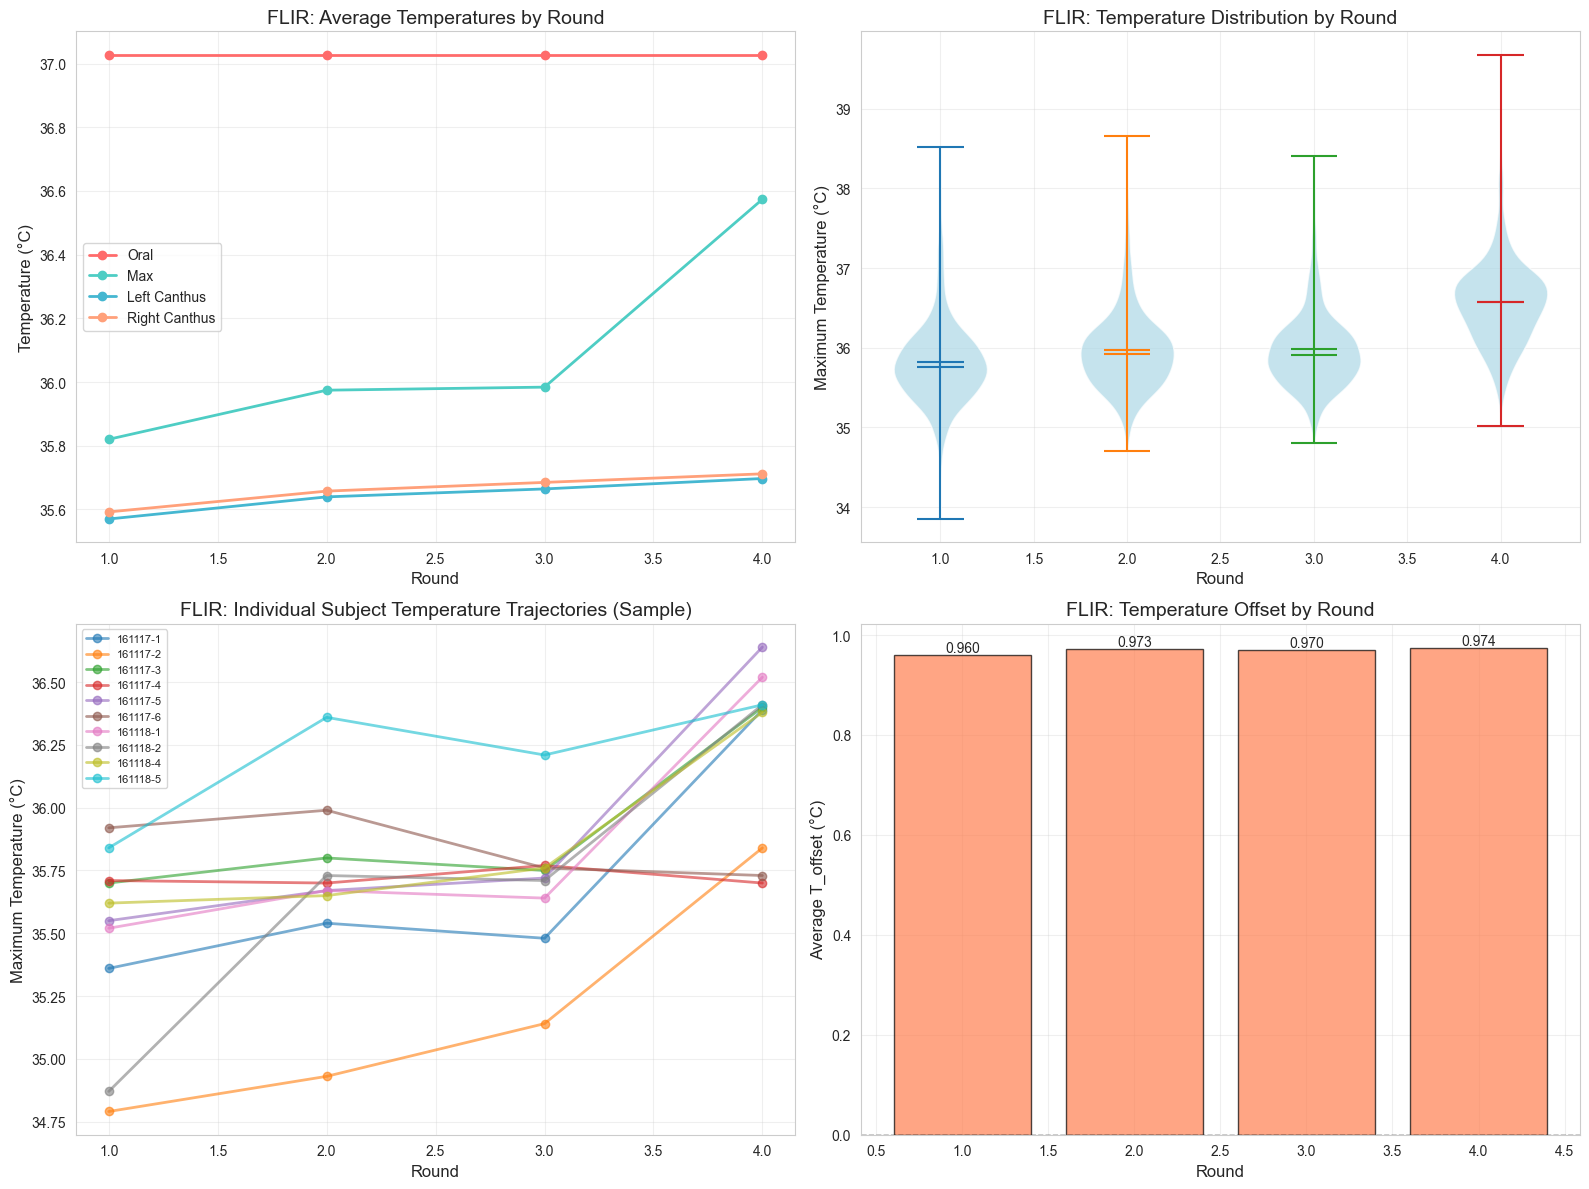


FLIR - ANOVA Test for Round Differences:
F-statistic: 395.2063
P-value: 0.0000
Significant differences found between rounds!


In [6]:
# Analyze temperature changes across rounds
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Average temperatures by round
round_means = flir_df.groupby('Round')[['aveOralM', 'T_Max', 'T_LC', 'T_RC']].mean()
round_means.plot(ax=axes[0, 0], marker='o', linewidth=2, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0, 0].set_xlabel('Round', fontsize=12)
axes[0, 0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0, 0].set_title('FLIR: Average Temperatures by Round', fontsize=14)
axes[0, 0].legend(['Oral', 'Max', 'Left Canthus', 'Right Canthus'])
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Temperature range by round
violin_parts = []
for round_num in [1, 2, 3, 4]:
    round_data = flir_df[flir_df['Round'] == round_num]['T_Max'].dropna()
    vp = axes[0, 1].violinplot([round_data], positions=[round_num], 
                          showmeans=True, showmedians=True)
    for pc in vp['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_alpha(0.7)

axes[0, 1].set_xlabel('Round', fontsize=12)
axes[0, 1].set_ylabel('Maximum Temperature (°C)', fontsize=12)
axes[0, 1].set_title('FLIR: Temperature Distribution by Round', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Individual subject trajectories (sample)
sample_subjects = flir_df['SubjectID'].unique()[:10]
colors = plt.cm.tab10(np.linspace(0, 1, len(sample_subjects)))
for idx, subject in enumerate(sample_subjects):
    subject_data = flir_df[flir_df['SubjectID'] == subject].sort_values('Round')
    axes[1, 0].plot(subject_data['Round'], subject_data['T_Max'], 
                    marker='o', alpha=0.6, linewidth=2, color=colors[idx], label=subject)

axes[1, 0].set_xlabel('Round', fontsize=12)
axes[1, 0].set_ylabel('Maximum Temperature (°C)', fontsize=12)
axes[1, 0].set_title('FLIR: Individual Subject Temperature Trajectories (Sample)', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(fontsize=8, loc='best')

# Plot 4: T_offset changes by round
round_offset = flir_df.groupby('Round')['T_offset'].mean()
bars = axes[1, 1].bar(round_offset.index, round_offset.values, color='coral', alpha=0.7, edgecolor='black')
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Round', fontsize=12)
axes[1, 1].set_ylabel('Average T_offset (°C)', fontsize=12)
axes[1, 1].set_title('FLIR: Temperature Offset by Round', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.savefig('flir_round_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical test for round differences
print("\nFLIR - ANOVA Test for Round Differences:")
rounds_data = [flir_df[flir_df['Round'] == r]['T_Max'].dropna() for r in [1, 2, 3, 4]]
f_stat, p_value = stats.f_oneway(*rounds_data)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant differences found between rounds!")
else:
    print("No significant differences between rounds.")

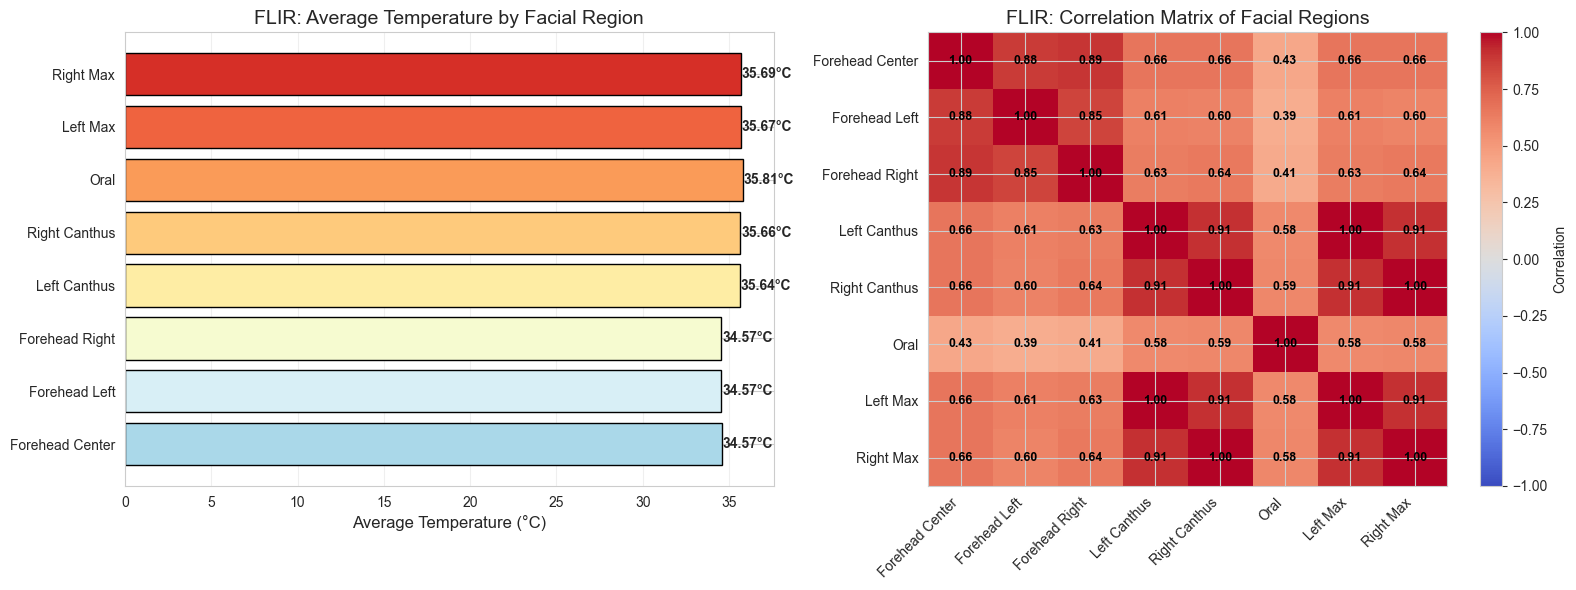

In [7]:
# Create a facial temperature heatmap
facial_regions = {
    'Forehead Center': 'T_FHCC',
    'Forehead Left': 'T_FHLC',
    'Forehead Right': 'T_FHRC',
    'Left Canthus': 'T_LC',
    'Right Canthus': 'T_RC',
    'Oral': 'T_OR',
    'Left Max': 'T_LC_Max',
    'Right Max': 'T_RC_Max'
}

# Calculate average temperatures for each region
region_temps = {}
for region, col in facial_regions.items():
    if col in flir_df.columns:
        region_temps[region] = flir_df[col].mean()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of regional temperatures
regions = list(region_temps.keys())
temps = list(region_temps.values())
colors = plt.cm.RdYlBu_r(np.linspace(0.3, 0.9, len(regions)))

bars = axes[0].barh(regions, temps, color=colors, edgecolor='black')
axes[0].set_xlabel('Average Temperature (°C)', fontsize=12)
axes[0].set_title('FLIR: Average Temperature by Facial Region', fontsize=14)
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, temp in zip(bars, temps):
    axes[0].text(temp + 0.05, bar.get_y() + bar.get_height()/2, 
                f'{temp:.2f}°C', va='center', fontsize=10, fontweight='bold')

# Correlation matrix of facial regions
facial_cols = [col for col in facial_regions.values() if col in flir_df.columns]
corr_matrix = flir_df[facial_cols].corr()

im = axes[1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1].set_xticks(range(len(facial_cols)))
axes[1].set_yticks(range(len(facial_cols)))
axes[1].set_xticklabels([k for k, v in facial_regions.items() if v in facial_cols], 
                        rotation=45, ha='right')
axes[1].set_yticklabels([k for k, v in facial_regions.items() if v in facial_cols])
axes[1].set_title('FLIR: Correlation Matrix of Facial Regions', fontsize=14)

# Add correlation values
for i in range(len(facial_cols)):
    for j in range(len(facial_cols)):
        text = axes[1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black", fontsize=9, fontweight='bold')

plt.colorbar(im, ax=axes[1], label='Correlation')
plt.tight_layout()
plt.savefig('flir_facial_region_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

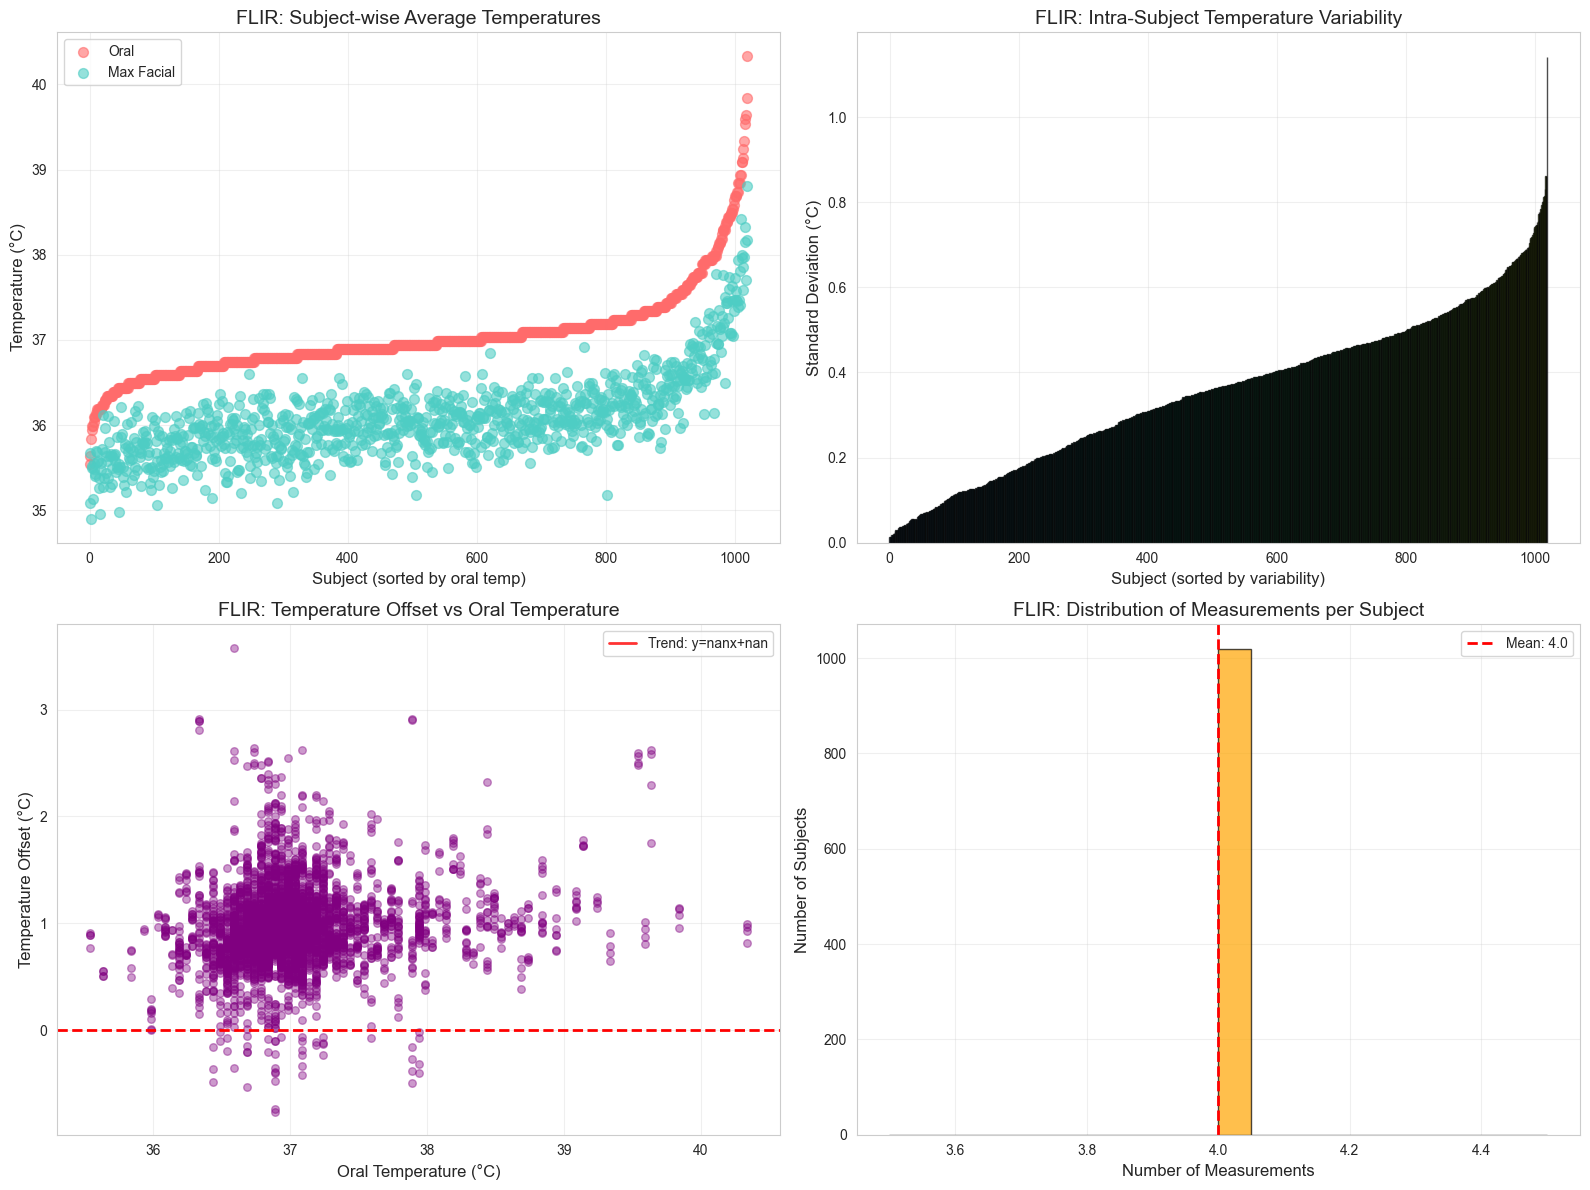


FLIR - Subject Variability Summary:
Number of subjects: 1020
Average measurements per subject: 4.0
Min measurements: 4
Max measurements: 4


In [8]:
# Analyze inter-subject and intra-subject variability
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Subject-wise average temperatures
subject_avg = flir_df.groupby('SubjectID').agg({
    'aveOralM': 'mean',
    'T_Max': 'mean',
    'T_offset': 'mean'
}).sort_values('aveOralM')

axes[0, 0].scatter(range(len(subject_avg)), subject_avg['aveOralM'], 
                   alpha=0.6, s=50, label='Oral', color='#FF6B6B')
axes[0, 0].scatter(range(len(subject_avg)), subject_avg['T_Max'], 
                   alpha=0.6, s=50, label='Max Facial', color='#4ECDC4')
axes[0, 0].set_xlabel('Subject (sorted by oral temp)', fontsize=12)
axes[0, 0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0, 0].set_title('FLIR: Subject-wise Average Temperatures', fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Intra-subject variability
subject_std = flir_df.groupby('SubjectID')['T_Max'].std().sort_values()
colors_bar = plt.cm.viridis(np.linspace(0.3, 0.9, len(subject_std)))
axes[0, 1].bar(range(len(subject_std)), subject_std.values, color=colors_bar, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Subject (sorted by variability)', fontsize=12)
axes[0, 1].set_ylabel('Standard Deviation (°C)', fontsize=12)
axes[0, 1].set_title('FLIR: Intra-Subject Temperature Variability', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Relationship between oral temp and offset
axes[1, 0].scatter(flir_df['aveOralM'], flir_df['T_offset'], alpha=0.4, s=30, color='purple')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Oral Temperature (°C)', fontsize=12)
axes[1, 0].set_ylabel('Temperature Offset (°C)', fontsize=12)
axes[1, 0].set_title('FLIR: Temperature Offset vs Oral Temperature', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(flir_df['aveOralM'].dropna(), 
               flir_df.loc[flir_df['aveOralM'].notna(), 'T_offset'], 1)
p = np.poly1d(z)
x_trend = np.linspace(flir_df['aveOralM'].min(), flir_df['aveOralM'].max(), 100)
axes[1, 0].plot(x_trend, p(x_trend), "r-", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.3f}x+{z[1]:.3f}')
axes[1, 0].legend()

# Plot 4: Distribution of measurements per subject
measurements_per_subject = flir_df.groupby('SubjectID').size()
axes[1, 1].hist(measurements_per_subject, bins=20, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Number of Measurements', fontsize=12)
axes[1, 1].set_ylabel('Number of Subjects', fontsize=12)
axes[1, 1].set_title('FLIR: Distribution of Measurements per Subject', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

# Add statistics text
mean_measurements = measurements_per_subject.mean()
axes[1, 1].axvline(mean_measurements, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_measurements:.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('flir_subject_variability.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFLIR - Subject Variability Summary:")
print(f"Number of subjects: {flir_df['SubjectID'].nunique()}")
print(f"Average measurements per subject: {measurements_per_subject.mean():.1f}")
print(f"Min measurements: {measurements_per_subject.min()}")
print(f"Max measurements: {measurements_per_subject.max()}")

In [9]:
# Generate comprehensive summary report
print("="*70)
print("FLIR DATASET - COMPREHENSIVE DATA ANALYSIS SUMMARY")
print("="*70)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total observations: {len(flir_df):,}")
print(f"   - Unique subjects: {flir_df['SubjectID'].nunique()}")
print(f"   - Date range: {flir_df['SubjectID'].str[:6].min()} to {flir_df['SubjectID'].str[:6].max()}")
print(f"   - Measurement rounds: {sorted(flir_df['Round'].unique())}")

print("\n2. TEMPERATURE SUMMARY:")
print(f"   Oral Temperature:")
print(f"   - Mean: {flir_df['aveOralM'].mean():.2f}°C (±{flir_df['aveOralM'].std():.2f})")
print(f"   - Range: [{flir_df['aveOralM'].min():.2f}, {flir_df['aveOralM'].max():.2f}]°C")
print(f"\n   Max Facial Temperature:")
print(f"   - Mean: {flir_df['T_Max'].mean():.2f}°C (±{flir_df['T_Max'].std():.2f})")
print(f"   - Range: [{flir_df['T_Max'].min():.2f}, {flir_df['T_Max'].max():.2f}]°C")
print(f"\n   Temperature Offset:")
print(f"   - Mean: {flir_df['T_offset'].mean():.2f}°C (±{flir_df['T_offset'].std():.2f})")

print("\n3. CORRELATIONS:")
key_correlations = flir_df[['aveOralM', 'T_Max', 'T_LC', 'T_RC', 'canthi4Max']].corr()['aveOralM'].sort_values(ascending=False)
print("   Correlation with Oral Temperature:")
for col, corr in key_correlations.items():
    if col != 'aveOralM':
        print(f"   - {col}: {corr:.3f}")

print("\n4. DATA QUALITY:")
completeness = (1 - flir_df.isnull().sum() / len(flir_df)) * 100
print("   Completeness by column (top variables):")
for col in ['aveOralM', 'T_Max', 'T_LC', 'T_RC', 'T_offset']:
    print(f"   - {col}: {completeness[col]:.1f}%")

print("\n" + "="*70)

FLIR DATASET - COMPREHENSIVE DATA ANALYSIS SUMMARY

1. DATASET OVERVIEW:
   - Total observations: 4,080
   - Unique subjects: 1020
   - Date range: 161117 to 180514
   - Measurement rounds: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

2. TEMPERATURE SUMMARY:
   Oral Temperature:
   - Mean: 37.03°C (±0.51)
   - Range: [35.54, 40.34]°C

   Max Facial Temperature:
   - Mean: 36.09°C (±0.60)
   - Range: [33.85, 39.68]°C

   Temperature Offset:
   - Mean: 0.97°C (±0.38)

3. CORRELATIONS:
   Correlation with Oral Temperature:
   - canthi4Max: 0.769
   - T_RC: 0.755
   - T_LC: 0.736
   - T_Max: 0.694

4. DATA QUALITY:
   Completeness by column (top variables):
   - aveOralM: 100.0%
   - T_Max: 98.4%
   - T_LC: 98.4%
   - T_RC: 98.4%
   - T_offset: 98.4%

